
<html>
<body>

<h1 style="text-align:center;">Exploratory Data Analysis for Data Analyst Job</h1>

</body>
</html>

Hello, I would like to analyze this dataset because I want to become a data analyst. From this dataset, I would like to look at:
- What programming language I should learn to become a data analyst?
- What about the salary of a data analyst job?
- Where industry I would be in if I become a data analyst?
- Where sector I would be in if I become a data analyst?

Before we go further, I'd like to tell you if I got this dataset from <a href="https://www.kaggle.com/kaanboke/plotly-data-analyst-jobs/data?select=DataAnalyst.csv">here</a>. So let's get started on it.

In [1]:
# Import Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# Load the DataFrame

df = pd.read_csv('DataAnalyst.csv')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

In [4]:
df.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

Can we trust this? We can look at the top 5 rows of the dataset there a lot of '-1'. We need to clean the data first before we can go further.

### Cleaning the Data!

In [5]:
df['Salary Estimate'] = df['Salary Estimate'].str.replace('$', '').str.replace('K', '')
df.head()

<ipython-input-5-d2d7a5459dc9>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Salary Estimate'] = df['Salary Estimate'].str.replace('$', '').str.replace('K', '')


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",37-66 (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,37-66 (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",37-66 (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,37-66 (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,37-66 (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [6]:
df['Salary Estimate'] = df['Salary Estimate'].str.replace('(Glassdoor est.)', '')
df.head()

<ipython-input-6-c56e4de7e3b2>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Salary Estimate'] = df['Salary Estimate'].str.replace('(Glassdoor est.)', '')


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",37-66 (),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,37-66 (),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",37-66 (),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,37-66 (),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,37-66 (),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [7]:
df['Salary Estimate'] = df['Salary Estimate'].str.replace('()', ' ')
df.head()

<ipython-input-7-49b586afb84c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Salary Estimate'] = df['Salary Estimate'].str.replace('()', ' ')


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",3 7 - 6 6 ( ),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,3 7 - 6 6 ( ),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",3 7 - 6 6 ( ),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,3 7 - 6 6 ( ),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,3 7 - 6 6 ( ),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [8]:
df['Salary Estimate'] = df['Salary Estimate'].str.replace(' ', '')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",37-66(),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,37-66(),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",37-66(),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,37-66(),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,37-66(),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [9]:
df['Salary Clean'] = df['Salary Estimate'].apply(lambda x: x.split('(')[0])
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Clean
0,0,"Data Analyst, Center on Immigration and Justic...",37-66(),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,37-66
1,1,Quality Data Analyst,37-66(),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,37-66
2,2,"Senior Data Analyst, Insights & Analytics Team...",37-66(),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,37-66
3,3,Data Analyst,37-66(),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,37-66
4,4,Reporting Data Analyst,37-66(),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37-66


In [10]:
# Replacing the '-1' into NaN

df['Rating'] = df['Rating'].replace(-1, np.nan)
df['Founded'] = df['Founded'].replace(-1, np.nan)
df['Headquarters'] = df['Headquarters'].replace('-1', np.nan)
df['Industry'] = df['Industry'].replace('-1', np.nan)
df['Sector'] = df['Sector'].replace('-1', np.nan)
df['Location'] = df['Location'].replace('-1', np.nan)
df['Size'] = df['Size'].replace('-1', np.nan)

In [11]:
# Remove the Row without the Salary Estimate

df = df[df['Salary Estimate'] != '-1']

In [12]:
# Clean Easy Apply Column

df['Easy Apply'] = df['Easy Apply'].apply(lambda x: 1 if x == 'True' else 0)
df['Easy Apply'] = df['Easy Apply'].astype(bool)
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Clean
0,0,"Data Analyst, Center on Immigration and Justic...",37-66(),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,37-66
1,1,Quality Data Analyst,37-66(),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,False,37-66
2,2,"Senior Data Analyst, Insights & Analytics Team...",37-66(),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,False,37-66
3,3,Data Analyst,37-66(),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,False,37-66
4,4,Reporting Data Analyst,37-66(),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37-66


##### Job Title Cleaning Data

In [13]:
df['Job Title'] = df['Job Title'].str.replace('Sr. Data Analyst', 'Senior Data Analyst')

<ipython-input-13-d9ba87606df5>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Job Title'] = df['Job Title'].str.replace('Sr. Data Analyst', 'Senior Data Analyst')


In [14]:
df['Job Title'] = df['Job Title'].str.replace('Sr Data Analyst', 'Senior Data Analyst')

In [15]:
df['Job Title'] = df['Job Title'].str.replace('Data Analyst Senior', 'Senior Data Analyst')

In [16]:
df['Job Title'] = df['Job Title'].str.replace('Jr. Data Analyst', 'Junior Data Analyst')

<ipython-input-16-111024a69fe6>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Job Title'] = df['Job Title'].str.replace('Jr. Data Analyst', 'Junior Data Analyst')


In [17]:
df['Job Title'] = df['Job Title'].str.replace('Jr Data Analyst', 'Junior Data Analyst')

In [18]:
df['Job Title'] = df['Job Title'].str.replace('Data Analyst Junior', 'Junior Data Analyst')

##### Get The Salary

In [19]:
df['Salary Minimum'] = df['Salary Clean'].apply(lambda x: x.split('-')[0])
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Clean,Salary Minimum
0,0,"Data Analyst, Center on Immigration and Justic...",37-66(),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,37-66,37
1,1,Quality Data Analyst,37-66(),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,False,37-66,37
2,2,"Senior Data Analyst, Insights & Analytics Team...",37-66(),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,False,37-66,37
3,3,Data Analyst,37-66(),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,False,37-66,37
4,4,Reporting Data Analyst,37-66(),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37-66,37


In [20]:
df['Salary Maximum'] = df['Salary Clean'].apply(lambda x: x.split('-')[1])
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Clean,Salary Minimum,Salary Maximum
0,0,"Data Analyst, Center on Immigration and Justic...",37-66(),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,37-66,37,66
1,1,Quality Data Analyst,37-66(),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,False,37-66,37,66
2,2,"Senior Data Analyst, Insights & Analytics Team...",37-66(),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,False,37-66,37,66
3,3,Data Analyst,37-66(),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,False,37-66,37,66
4,4,Reporting Data Analyst,37-66(),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37-66,37,66


In [21]:
df['Salary Minimum'] = df['Salary Minimum'].astype('int32')
df['Salary Maximum'] = df['Salary Maximum'].astype('int32')

In [22]:
df['Average Salary'] = (df['Salary Minimum'] + df['Salary Maximum']) / 2
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Clean,Salary Minimum,Salary Maximum,Average Salary
0,0,"Data Analyst, Center on Immigration and Justic...",37-66(),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,37-66,37,66,51.5
1,1,Quality Data Analyst,37-66(),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,False,37-66,37,66,51.5
2,2,"Senior Data Analyst, Insights & Analytics Team...",37-66(),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,False,37-66,37,66,51.5
3,3,Data Analyst,37-66(),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,False,37-66,37,66,51.5
4,4,Reporting Data Analyst,37-66(),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37-66,37,66,51.5


In [23]:
df['Company Name'] = df['Company Name'].astype(str)
df['Company Name Clean'] = df['Company Name'].apply(lambda x: x.split('\n')[0])
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Clean,Salary Minimum,Salary Maximum,Average Salary,Company Name Clean
0,0,"Data Analyst, Center on Immigration and Justic...",37-66(),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,...,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,37-66,37,66,51.5,Vera Institute of Justice
1,1,Quality Data Analyst,37-66(),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,...,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,False,37-66,37,66,51.5,Visiting Nurse Service of New York
2,2,"Senior Data Analyst, Insights & Analytics Team...",37-66(),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,...,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,False,37-66,37,66,51.5,Squarespace
3,3,Data Analyst,37-66(),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002.0,...,IT Services,Information Technology,$50 to $100 million (USD),-1,False,37-66,37,66,51.5,Celerity
4,4,Reporting Data Analyst,37-66(),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,...,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37-66,37,66,51.5,FanDuel


In [24]:
# Add 'Age of Company' column

df['Age of Company'] = 2021 - df['Founded']
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Sector,Revenue,Competitors,Easy Apply,Salary Clean,Salary Minimum,Salary Maximum,Average Salary,Company Name Clean,Age of Company
0,0,"Data Analyst, Center on Immigration and Justic...",37-66(),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,...,Non-Profit,$100 to $500 million (USD),-1,True,37-66,37,66,51.5,Vera Institute of Justice,60.0
1,1,Quality Data Analyst,37-66(),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,...,Health Care,$2 to $5 billion (USD),-1,False,37-66,37,66,51.5,Visiting Nurse Service of New York,128.0
2,2,"Senior Data Analyst, Insights & Analytics Team...",37-66(),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,...,Information Technology,Unknown / Non-Applicable,GoDaddy,False,37-66,37,66,51.5,Squarespace,18.0
3,3,Data Analyst,37-66(),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002.0,...,Information Technology,$50 to $100 million (USD),-1,False,37-66,37,66,51.5,Celerity,19.0
4,4,Reporting Data Analyst,37-66(),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,...,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37-66,37,66,51.5,FanDuel,12.0


In [25]:
# Drop unnecessary colummn

df.drop(columns = 'Unnamed: 0', inplace = True)

In [26]:
df.isnull().sum()

Job Title               0
Salary Estimate         0
Job Description         0
Rating                272
Company Name            0
Location                0
Headquarters          172
Size                  163
Founded               660
Type of ownership       0
Industry              353
Sector                353
Revenue                 0
Competitors             0
Easy Apply              0
Salary Clean            0
Salary Minimum          0
Salary Maximum          0
Average Salary          0
Company Name Clean      0
Age of Company        660
dtype: int64

Now the data is clean enough for the analysis.

### Look at The Popular Programming Language Used

I want to be a data analyst. But I was confused about the programming language that I should learn to become a data analyst. Now, let's take a look at popular programming languages that could be used for data analyst jobs.

In [27]:
# Look at Python

df['Python'] = df['Job Description'].str.contains('python', na = False, case = False)
df['Python'].value_counts()

False    1615
True      637
Name: Python, dtype: int64

In [28]:
# Look at SQL

df['SQL'] = df['Job Description'].str.contains('sql', na = False, case = False)
df['SQL'].value_counts()

True     1388
False     864
Name: SQL, dtype: int64

In [29]:
# Look at Excel

df['Excel'] = df['Job Description'].str.contains('excel', na = False, case = False)
df['Excel'].value_counts()

True     1353
False     899
Name: Excel, dtype: int64

In [30]:
# Look at Tableau

df['Tableau'] = df['Job Description'].str.contains('tableau', na = False, case = False)
df['Tableau'].value_counts()

False    1632
True      620
Name: Tableau, dtype: int64

In [31]:
# Look at R

df['R'] = df['Job Description'].str.contains((' R ' or ' R,' or 'RStudio' or 'R-Studio' or 'R Studio'), na = False, case = True)
df['R'].value_counts()

False    2131
True      121
Name: R, dtype: int64

In [32]:
# Look at Cognos

df['Cognos'] = df['Job Description'].str.contains('cognos', na = False, case = False)
df['Cognos'].value_counts()

False    2211
True       41
Name: Cognos, dtype: int64

Wow! I don't expect there are 41 jobs that mention `'Cognos'` on their `Job Description`. I thought is not a really popular tool for data visualization. Let's take a look at it.

In [52]:
# Cognos

Cognos = df[df['Cognos'] == True]
Cognos[['Company Name Clean', 'Industry', 'Sector', 'Founded', 'Salary Minimum', 'Salary Maximum', 'Average Salary']].head(15)

,Company Name Clean,Industry,Sector,Founded,Salary Minimum,Salary Maximum,Average Salary
92,RGP,Consulting,Business Services,1996.0,51,87,69.0
229,Seven Seven Softwares,IT Services,Information Technology,1996.0,41,78,59.5
246,Horizon Blue Cross Blue Shield of New Jersey,Insurance Carriers,Insurance,1932.0,45,88,66.5
390,ITech Recruiting,NaN,NaN,NaN,98,114,106.0
405,Lorven Technologies Inc,Accounting,Accounting & Legal,NaN,48,96,72.0
474,Counter Threat Solutions,Consulting,Business Services,2015.0,43,69,56.0
491,Counter Threat Solutions,Consulting,Business Services,2015.0,49,112,80.5
831,Avani Technology Solutions,IT Services,Information Technology,2008.0,42,76,59.0
867,Kbyte Systems LLC.,NaN,NaN,NaN,97,129,113.0
1024,Saviance Technologies,IT Services,Information Technology,1999.0,46,102,74.0


Let's we use `groupby` function to look at the `Job Title` and each popular programming languages.

In [34]:
GroupByJobTitle = df.groupby('Job Title')[['Python', 'SQL', 'Excel', 'Tableau', 
                                           'R', 'Cognos']].sum().sort_values(by = 'Python', ascending = False)
GroupByJobTitle.head()

,Python,SQL,Excel,Tableau,R,Cognos
Job Title,,,,,,
Data Analyst,125,301,239,110,22,4
Senior Data Analyst,68,104,67,64,12,3
Business Data Analyst,11,21,17,11,0,0
NY Healthcare Data/Reporting Analyst,5,5,5,5,0,0
Marketing Data Analyst,5,9,6,5,0,0


In [35]:
GroupByJobTitle['Number of Job'] = df['Job Title'].value_counts().values
GroupByJobTitle.head()

,Python,SQL,Excel,Tableau,R,Cognos,Number of Job
Job Title,,,,,,,
Data Analyst,125,301,239,110,22,4,405
Senior Data Analyst,68,104,67,64,12,3,121
Business Data Analyst,11,21,17,11,0,0,50
NY Healthcare Data/Reporting Analyst,5,5,5,5,0,0,28
Marketing Data Analyst,5,9,6,5,0,0,17


In [36]:
GroupByJobTitle = GroupByJobTitle.reset_index()
GroupByJobTitle.head()

,Job Title,Python,SQL,Excel,Tableau,R,Cognos,Number of Job
0,Data Analyst,125,301,239,110,22,4,405
1,Senior Data Analyst,68,104,67,64,12,3,121
2,Business Data Analyst,11,21,17,11,0,0,50
3,NY Healthcare Data/Reporting Analyst,5,5,5,5,0,0,28
4,Marketing Data Analyst,5,9,6,5,0,0,17


In [37]:
GroupByJobTitle = GroupByJobTitle[['Job Title', 'Number of Job', 'Python', 'SQL','Excel', 'Tableau', 'R', 'Cognos']]
GroupByJobTitle.head()

,Job Title,Number of Job,Python,SQL,Excel,Tableau,R,Cognos
0,Data Analyst,405,125,301,239,110,22,4
1,Senior Data Analyst,121,68,104,67,64,12,3
2,Business Data Analyst,50,11,21,17,11,0,0
3,NY Healthcare Data/Reporting Analyst,28,5,5,5,5,0,0
4,Marketing Data Analyst,17,5,9,6,5,0,0


Okay, from the table above, we can see that from this dataset SQL is the most used programming language for data analyst jobs.

I'm still at college for now. If I will become a data analyst, I would be a Junior Data Analyst first before I become a Senior Data Analyst. Let's take a look at Junior Data Analyst from this dataset.

In [38]:
JuniorDataAnalyst = df[df['Job Title'] == 'Junior Data Analyst']
JuniorDataAnalyst.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Salary Maximum,Average Salary,Company Name Clean,Age of Company,Python,SQL,Excel,Tableau,R,Cognos
64,Junior Data Analyst,51-88(),RESPONSIBILITIES:\n\nKforce has a client in se...,4.1,Kforce\n4.1,"New York, NY","Tampa, FL",10000+ employees,1966.0,Company - Public,...,88,69.5,Kforce,55.0,True,True,True,True,False,False
124,Junior Data Analyst,59-85(),Job Description\nJob description\nInterpret da...,5.0,"Staffigo Technical Services, LLC\n5.0","New York, NY","Woodridge, IL",51 to 200 employees,2008.0,Company - Private,...,85,72.0,"Staffigo Technical Services, LLC",13.0,False,True,True,False,False,False
346,Junior Data Analyst,77-132(),Job Description\nJob description\nInterpret da...,5.0,"Staffigo Technical Services, LLC\n5.0","New York, NY","Woodridge, IL",51 to 200 employees,2008.0,Company - Private,...,132,104.5,"Staffigo Technical Services, LLC",13.0,False,True,True,False,False,False
428,Junior Data Analyst,26-47(),About Abnormal Security:\nAbnormal Security is...,4.1,Abnormal Security\n4.1,"Lehi, UT","San Francisco, CA",51 to 200 employees,2018.0,Company - Private,...,47,36.5,Abnormal Security,3.0,False,False,True,False,False,False
460,Junior Data Analyst,43-69(),Junior Data Analyst\n\nAbout Us\n\nPatient Adv...,2.7,Patient Advocate Foundation\n2.7,"Hampton, VA","Hampton, VA",51 to 200 employees,1996.0,Nonprofit Organization,...,69,56.0,Patient Advocate Foundation,25.0,False,True,True,True,False,False


In [39]:
print(JuniorDataAnalyst['Python'].value_counts())
print(JuniorDataAnalyst['SQL'].value_counts())
print(JuniorDataAnalyst['Excel'].value_counts())
print(JuniorDataAnalyst['Tableau'].value_counts())
print(JuniorDataAnalyst['R'].value_counts())
print(JuniorDataAnalyst['Cognos'].value_counts())

False    47
True      3
Name: Python, dtype: int64
True     46
False     4
Name: SQL, dtype: int64
True     48
False     2
Name: Excel, dtype: int64
False    46
True      4
Name: Tableau, dtype: int64
False    50
Name: R, dtype: int64
False    50
Name: Cognos, dtype: int64


I need to be able to master Excel and SQL if I want to become a Junior Data Analyst.

**How about the salary?**

In [40]:
JuniorDataAnalyst[['Salary Minimum', 'Salary Maximum', 'Average Salary']].describe()

,Salary Minimum,Salary Maximum,Average Salary
count,50.000000,50.000000,50.00000
mean,47.820000,78.700000,63.26000
std,15.953619,25.217624,19.85926
min,24.000000,42.000000,36.00000
25%,35.000000,66.000000,51.00000
50%,43.000000,76.000000,59.00000
75%,57.750000,86.000000,73.00000
max,93.000000,159.000000,126.00000


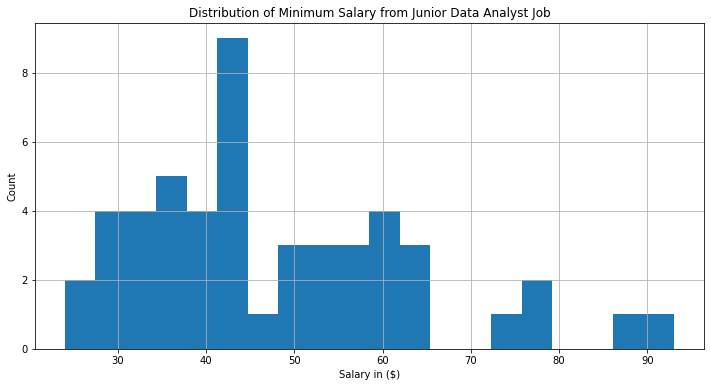

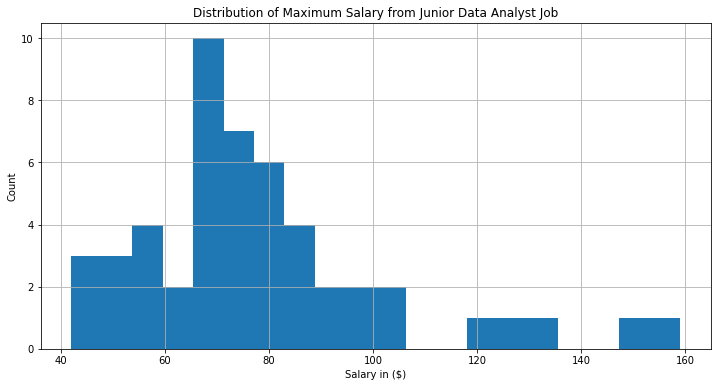

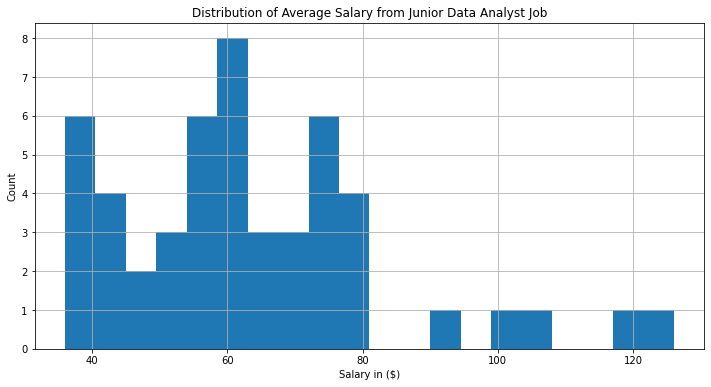

In [41]:
# Salary Minimum

plt.figure(figsize = (12, 6))
plt.hist(JuniorDataAnalyst['Salary Minimum'], bins = 20)
plt.title('Distribution of Minimum Salary from Junior Data Analyst Job')
plt.xlabel('Salary in ($)')
plt.ylabel('Count')
plt.grid()
plt.show()

# Salary Maximum

plt.figure(figsize = (12, 6))
plt.hist(JuniorDataAnalyst['Salary Maximum'], bins = 20)
plt.title('Distribution of Maximum Salary from Junior Data Analyst Job')
plt.xlabel('Salary in ($)')
plt.ylabel('Count')
plt.grid()
plt.show()

# Average Salary

plt.figure(figsize = (12, 6))
plt.hist(JuniorDataAnalyst['Average Salary'], bins = 20)
plt.title('Distribution of Average Salary from Junior Data Analyst Job')
plt.xlabel('Salary in ($)')
plt.ylabel('Count')
plt.grid()
plt.show()

#### What industry will I be in if I become a data analyst?

In [42]:
# Top 10 Industry for data analyst

Industry = df['Industry'].value_counts()[:10].sort_values(ascending = True)
Industry

Banks & Credit Unions                       51
Advertising & Marketing                     51
Internet                                    65
Enterprise Software & Network Solutions     69
Investment Banking & Asset Management       78
Consulting                                 111
Computer Hardware & Software               111
Health Care Services & Hospitals           151
Staffing & Outsourcing                     322
IT Services                                325
Name: Industry, dtype: int64

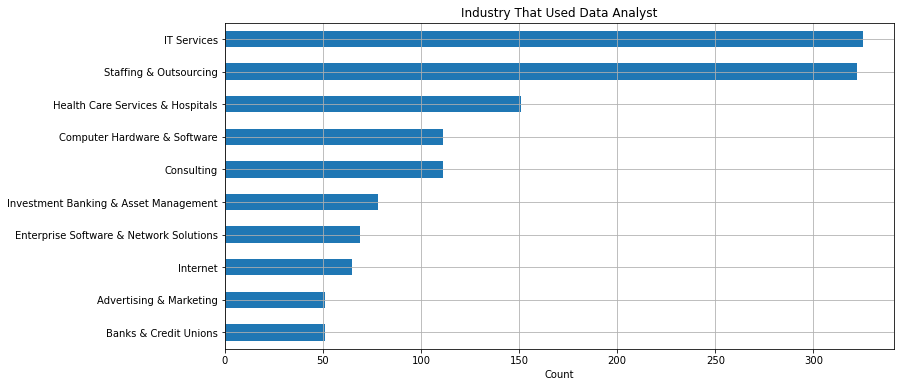

In [43]:
Industry.plot(kind = 'barh', figsize = (12, 6))
plt.grid()
plt.title('Industry That Used Data Analyst')
plt.xlabel('Count')
plt.show()

#### What sector will I be in if I become a data analyst?

In [44]:
# Top 10 Sector for data analyst

Sector = df['Sector'].value_counts()[:10].sort_values(ascending = True)
Sector

Retail                     38
Manufacturing              40
Media                      42
Accounting & Legal         43
Insurance                  51
Education                  52
Health Care               151
Finance                   169
Business Services         523
Information Technology    570
Name: Sector, dtype: int64

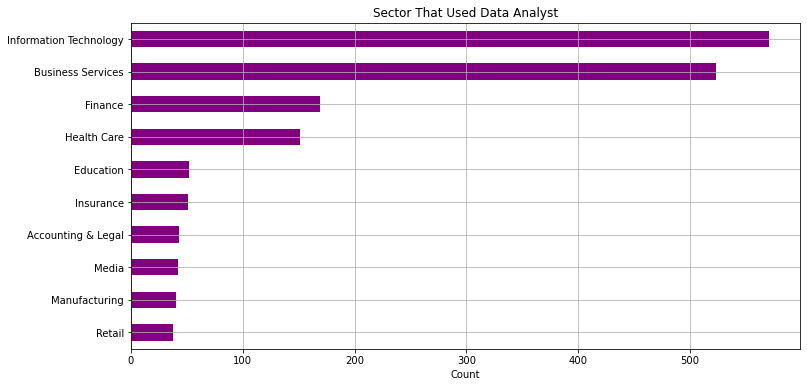

In [45]:
Sector.plot(kind = 'barh', figsize = (12, 6), color = 'purple')
plt.grid()
plt.title('Sector That Used Data Analyst')
plt.xlabel('Count')
plt.show()

#### Correlation

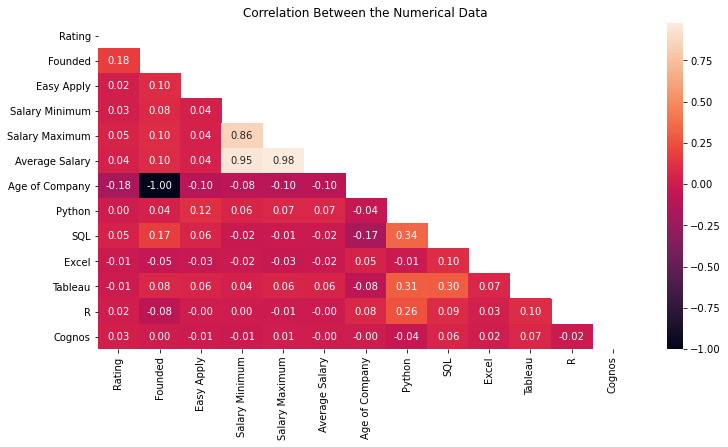

In [51]:
Corr = df.corr()

plt.figure(figsize = (12, 6))
sns.heatmap(Corr, annot = True, mask = np.triu(Corr), fmt = '.2f')
plt.title('Correlation Between the Numerical Data')
plt.show()

#### Easy Apply Visualization

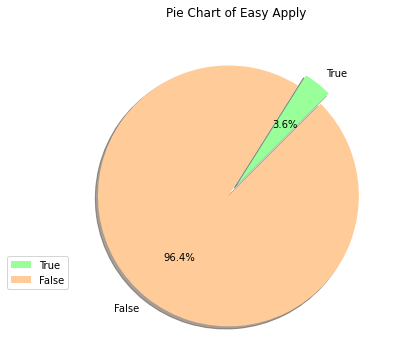

In [47]:
plt.figure(figsize = (12, 6))
plt.pie(df['Easy Apply'].value_counts().sort_values(), labels = ['True', 'False'], autopct = '%.1f%%',
        shadow = True, startangle = 45, explode = [0, 0.1], colors = ['#99ff99','#ffcc99'])
plt.title('Pie Chart of Easy Apply')
plt.legend(frameon=True, bbox_to_anchor=(0.0, 0.3))
plt.show()

Just a little number of the company uses Easy Apply's feature.

#### What is the most common word appear in the Job Description column?

We can use WordCloud if we want to see the most common word that appears in a column.

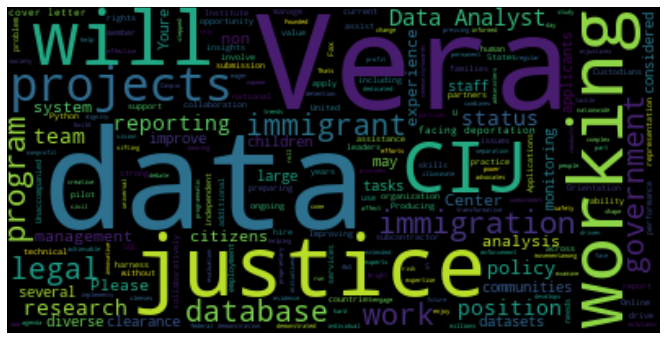

In [63]:
# Start with one review
text = df['Job Description'][0]

# Create and generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image
plt.figure(figsize = (12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

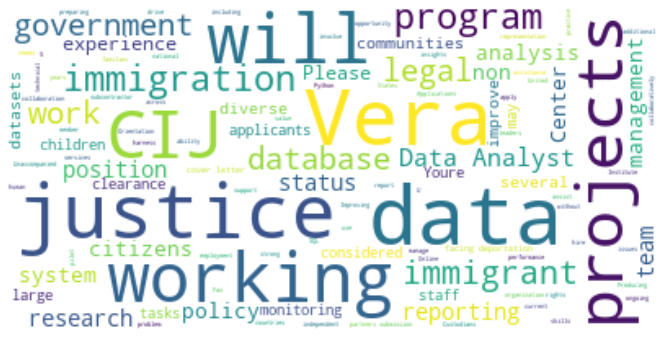

In [62]:
# lower max_font_size, change the maximum number of word and lighten the background

wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="white").generate(text)
plt.figure(figsize = (12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Conclusion

From the analysis above, we can answer all those questions.

##### What programming language I should learn to become a data analyst?

We can see that the most used programming language for data analysts is SQL, followed by Excel, Python, Tableau, R, and Cognos. Very interesting because the number for R is too little if we compare it with Python from this dataset.

##### What about the salary of a data analyst job?

Now, let's talk about salary. From this analysis, I'm just using Junior Data Analyst because that is the most possible position that I could get for now. And the average salary that I could get if I become a Junior Data Analyst is around $55K - $65K.

##### Where industry I would be in if I become a data analyst?

IT Services is the most industry that used data analyst, followed by Health Care and Consulting.

##### Where sector I would be in if I become a data analyst?

Information Technology is the most sector that used data analyst, followed by Business Services and Finance.

<html>
<body>

<h1 style="text-align:center;">Thank You!</h1>

</body>
</html>